<a href="https://colab.research.google.com/github/namphuong01998/ImageProcessing_lab1/blob/main/Lab1_XLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
from pylab import imread
from skimage.color import rgb2gray



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def imshows(ImageData, LabelData, rows, cols, gridType = False):

  # Convert ImageData and LabelData to List
  from matplotlib import pyplot as plt
  ImageArray = list(ImageData)
  LabelArray = list(LabelData)
  if(rows == 1 & cols == 1):
    fig = plt.figure(figsize=(20,20))
  else:
    fig = plt.figure(figsize=(cols*8,rows*5))
  
  for i in range(1, cols * rows + 1):
    fig.add_subplot(rows, cols, i)
    image = ImageArray[i - 1]
    # If the channel number is less than 3, we display as grayscale image
    # otherwise, we display as color image
    if (len(image.shape) < 3):
      plt.imshow(image, plt.cm.gray)
      plt.grid(gridType)
    else:
      plt.imshow(image)
      plt.grid(gridType)
    plt.title(LabelArray[i - 1])
  plt.show()


def ShowThreeImages(IM1, IM2, IM3):
    imshows([IM1, IM2, IM3], ["Image 1","Image 2", "Image 3"], 1, 3)
def ShowTwoImages(IM1, IM2):
    imshows([IM1, IM2], ["Image 1","Image 2"], 1, 2)
def ShowOneImage(IM):
    imshows([IM], ["Image"], 1, 1)
def ShowListImages(listImage, row, col):
    listCaption = []
    for i in range(len(listImage)):
        listCaption.append(str(i))
    imshows(listImage,listCaption,row,col)

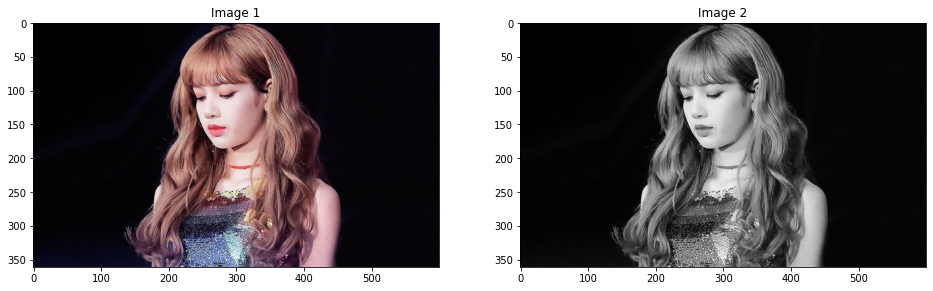

In [ ]:
# EXERCISE 1
image_color = imread("/content/drive/My Drive/0. STUDYING Peo Peo/PYTHON/Image/Lisa.jpg") # read image

# 1:
# Convert Image into Gray
image_gray = cv2.cvtColor(image_color, cv2.COLOR_RGB2GRAY)

ShowTwoImages(image_color, image_gray)  # display image

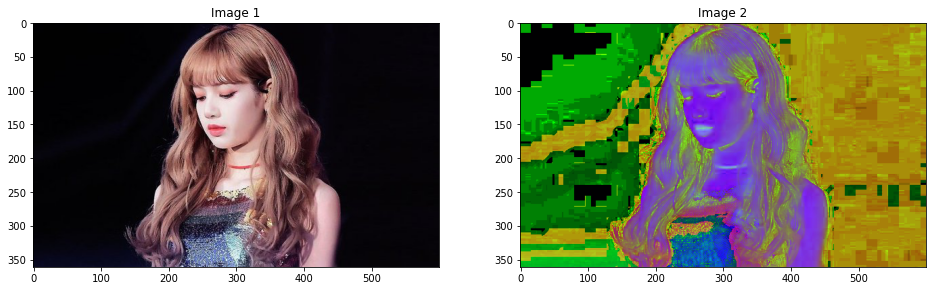

In [ ]:
# 2:
# Convert Image into HSV color spaces
image_hsv = cv2.cvtColor(image_color, cv2.COLOR_BGR2HSV)
ShowTwoImages(image_color, image_hsv)

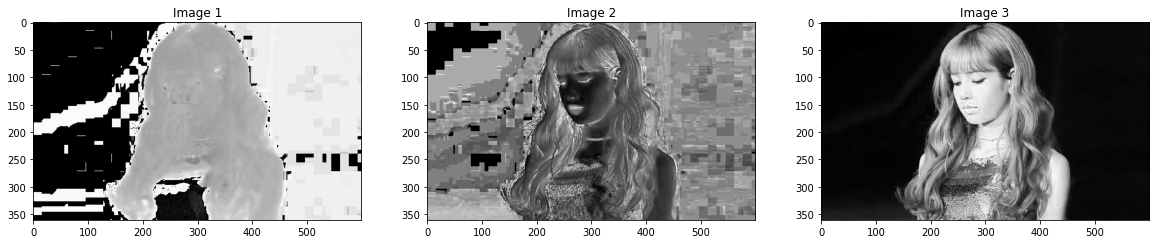

In [ ]:
# Show each channel H , S and V
ShowThreeImages(image_hsv[:,:,0],image_hsv[:,:,1],image_hsv[:,:,2]) # It means: image_hsv[:, :, 0] --> heu 
                                                                    #           image_hsv[:, :, 1] --> saturation
                                                                    #           image_hsv[:, :, 2] --> value (lightness)

In [ ]:
def SegmentColorImageByMask(IM, Mask):
  Mask = Mask.astype(np.uint8)                    # mask = ảnh có nền màu đen  (là số  0),  object màu trắng  (là số 1)
  result = cv2.bitwise_and(IM, IM, mask = Mask)   #  Khi  nhân 2  ma trận  (ảnh màu x  mask)  ==>  Object  x  màu trắng của mask (số 1)-->>  giữ nguyên  object
  return result                                   #                                           ==>  Nền  x  màu đen (số  0)-->  ra 0  (nền có mau đen)
                                                  #

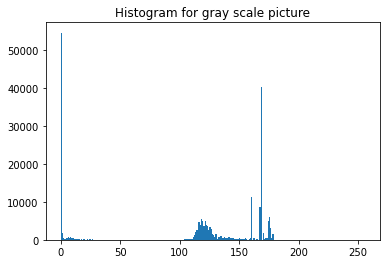

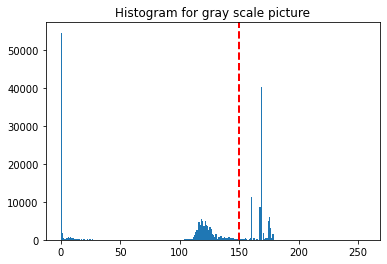

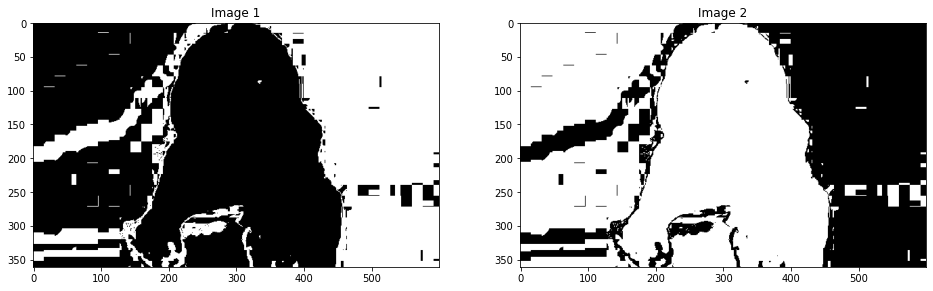

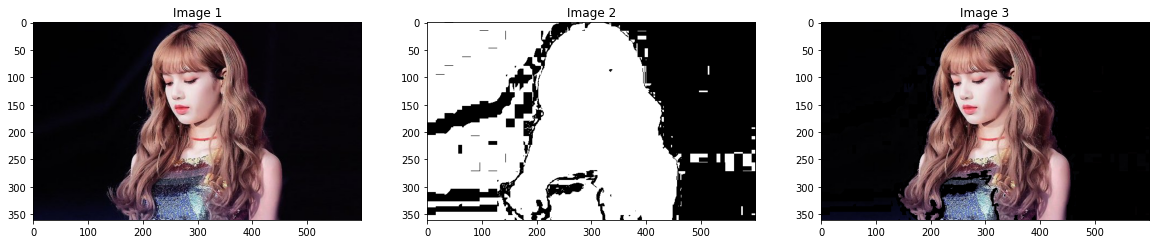

In [ ]:
# 3: Chọn ngưỡng hue để trích xuất đối tượng chủ đạo trong ảnh (hiển thị ảnh màu đối tượng sau khi trích xuất)
# Function
def SegmentColorImageByMask(IM, Mask):
  Mask = Mask.astype(np.uint8)
  result = cv2.bitwise_and(IM, IM, mask = Mask)
  return result

# Show Histogram of Hue Channel
hist = cv2.calcHist([hue_img],[0],None,[256],[0,256])
plt.hist(hue_img.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')
plt.show()

# Nhìn histogram  =>  Chọn  ngưỡng hue
hue_threshold = 150
hist = cv2.calcHist([hue_img],[0],None,[256],[0,256])
plt.hist(hue_img.ravel(),256,[0,256])
plt.title('Histogram for gray scale picture')
plt.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
plt.show()

# Use threshold to segment object by histogram
hue_binary01 = hue_img > hue_threshold
hue_binary02 = 1 - hue_binary01
ShowTwoImages(hue_binary01, hue_binary02)

hue_binary02_rgb = SegmentColorImageByMask(image_color, hue_binary02)
ShowThreeImages(image_color, hue_binary02, hue_binary02_rgb)

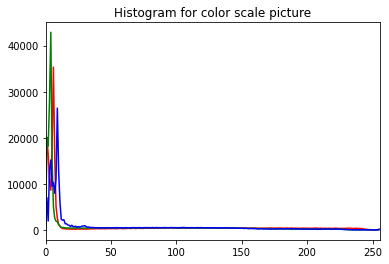

In [ ]:
# 4:
# Histogram 3 chanels r,g,b
color = ('r', 'g', 'b')

for channel,col in enumerate(color):
  histr = cv2.calcHist([image_color],[channel],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

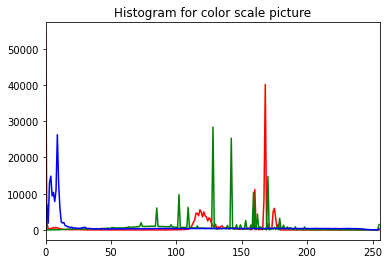

In [ ]:
# Histogram 3 chanels h,s,v

color = ('r', 'g', 'b')

for channel,col in enumerate(color):
  histr = cv2.calcHist([image_hsv],[channel],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
plt.title('Histogram for color scale picture')
plt.show()

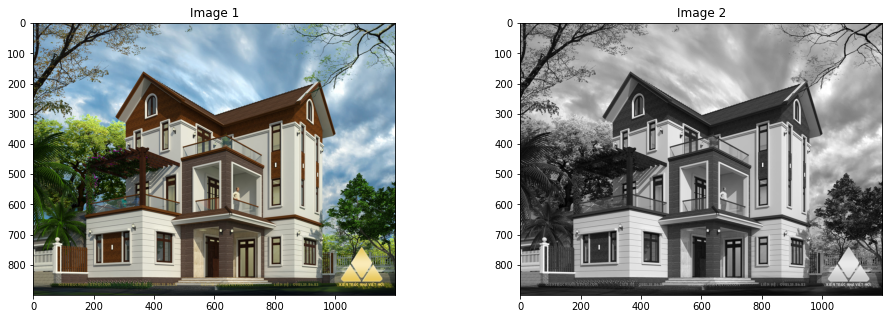

In [ ]:
# EXERCISE 2:
image2_color = imread("/content/drive/My Drive/0. STUDYING Peo Peo/PYTHON/Image/nha.jpg") # read image

# 1. Convert Image into Gray
image2_gray = cv2.cvtColor(image2_color,cv2.COLOR_RGB2GRAY)
ShowTwoImages(image2_color, image2_gray)

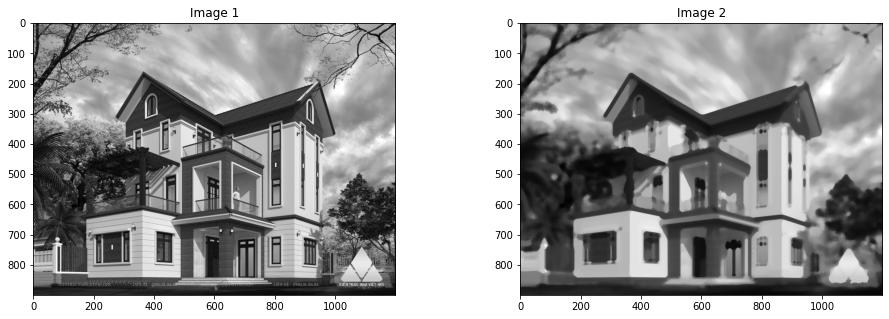

In [ ]:
# 2. Create Blurred Image
from skimage.filters.rank import median
from skimage.morphology import disk

image2_blurred = median(image2_gray, disk(10))
ShowTwoImages(image2_gray, image2_blurred)

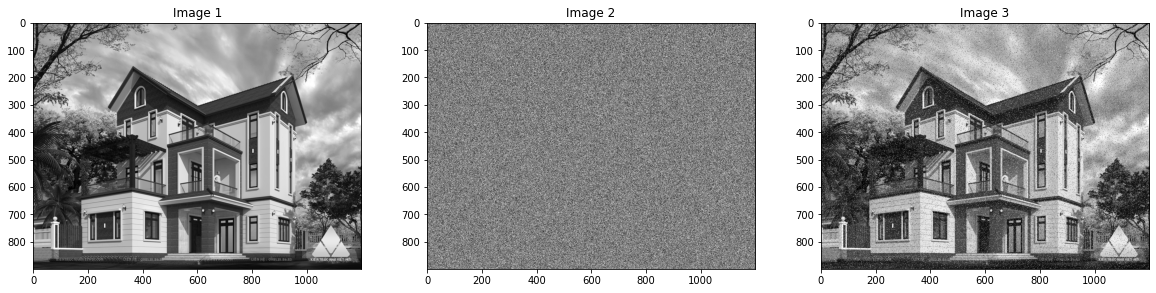

array([[0.33504388, 0.52749561, 0.27790358, ..., 0.69985588, 0.13603267,
        0.91733566],
       [0.05927399, 0.71763511, 0.44203847, ..., 0.51751432, 0.54117196,
        0.1299472 ],
       [0.33972995, 0.89268854, 0.10681537, ..., 0.69426268, 0.09520649,
        0.01408427],
       ...,
       [0.97138067, 0.56772326, 0.94502223, ..., 0.01177969, 0.23832139,
        0.09008316],
       [0.1887174 , 0.58981879, 0.87787969, ..., 0.04600342, 0.66682835,
        0.43380082],
       [0.85985815, 0.42305254, 0.42915573, ..., 0.71661128, 0.92492754,
        0.80395954]])

In [ ]:
# 3. Create Noise Image

noise = np.random.random(image2_gray.shape)
image_noise = image2_gray.copy()
image_noise[noise > 0.95] = 255   # rac muoi (mau trang)
image_noise[noise < 0.03] = 0     # rac tieu (mau den) , Ex: [noise < 1] ==> Picture will be a black picture
ShowThreeImages(image2_gray, noise, image_noise)

noise # ma tran noise

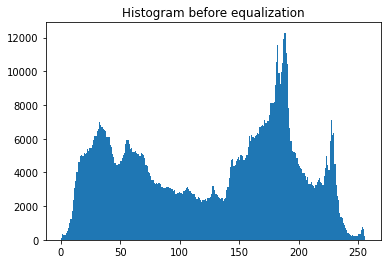

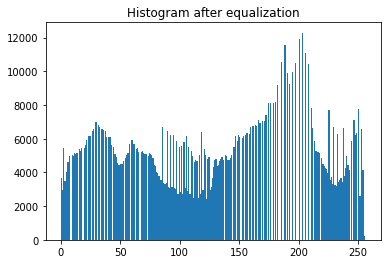

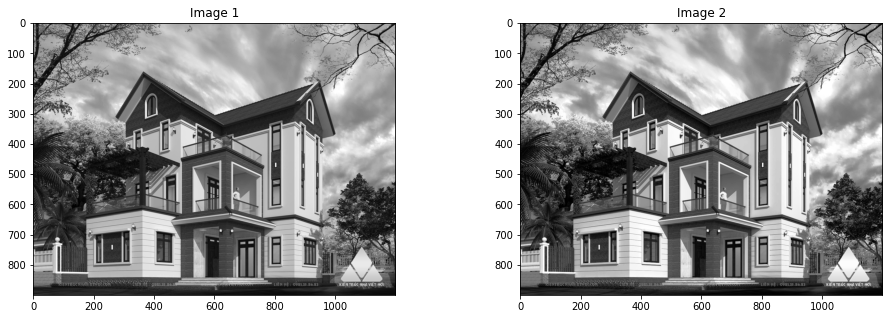

In [ ]:
# 4. Hiển thị histogram của ảnh xám và cân bằng histogram, hiển thị ảnh sau khi cân bằng

from skimage import data, exposure

image_equalization = exposure.equalize_hist(image2_gray)
image_equalization = np.float32(image_equalization * 255)

# Histogram of grayscale image. 
hist = cv2.calcHist([image2_gray],[0],None,[256],[0,256])
plt.hist(image2_gray.ravel(),256,[0,256])
plt.title('Histogram before equalization')
plt.show()

# Grayscale image Equalization
hist = cv2.calcHist([image_equalization],[0],None,[256],[0,256])
plt.hist(image_equalization.ravel(),256,[0,256])
plt.title('Histogram after equalization')
plt.show()

# Show Image equazation
ShowTwoImages(image2_gray, image_equalization)


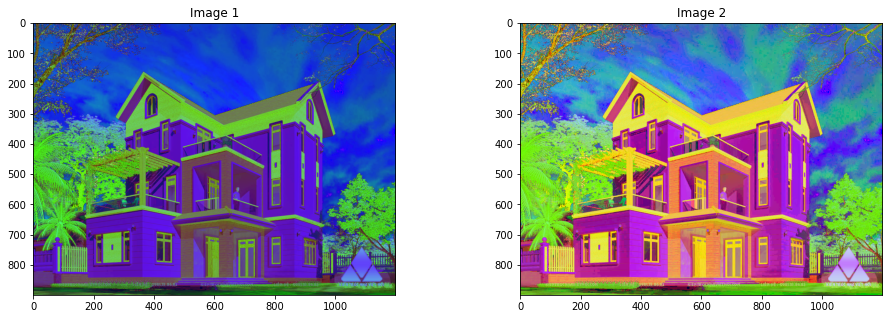

In [ ]:
# 5.Cân bằng 3 kênh màu hsv cùng lúc và hiển thị ảnh kết quả sau khi cân bằng

# Function: histogram_equalize
def histogram_equalize(img):
  h, s, v = cv2.split(img)     # Tach thanh 3 anh rieng biet: heu, saturation, value  
  heu = cv2.equalizeHist(h)    # Can bang histogram cua 'heu image'
  saturation = cv2.equalizeHist(s)  # Can bang histogram cua 'saturation image'
  value = cv2.equalizeHist(v)   # Can bang histogram cua 'value image'
  return cv2.merge((heu, saturation, value))

# HSV image Equalization. Show 
image2_hsv = cv2.cvtColor(image2_color, cv2.COLOR_BGR2HSV)
image2_hsv_equal = histogram_equalize(image2_hsv)

ShowTwoImages(image2_hsv, image2_hsv_equal)


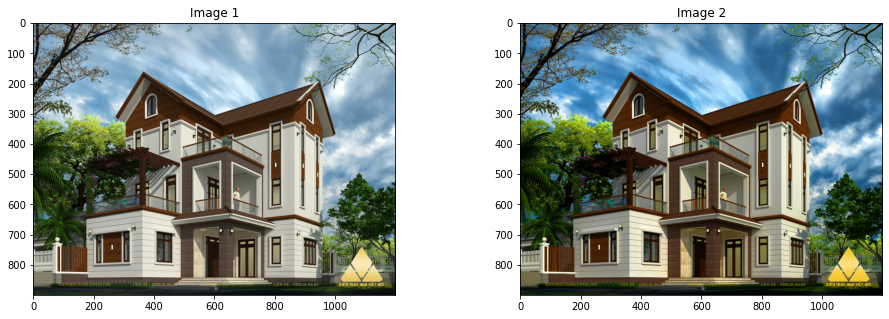

In [ ]:
# 6. Enhance ảnh bằng cách cân bằng histogram kênh s và v

# Convert Image into HSV color spaces
image2_hsv = cv2.cvtColor(image2_color, cv2.COLOR_RGB2HSV)
# Apply histogram equalization
channel = 1
image2_hsv[:, :, channel] = cv2.equalizeHist(image2_hsv[:, :, channel]) # Can bang histogram kenh s
channel = 2
image2_hsv[:, :, channel] = cv2.equalizeHist(image2_hsv[:, :, channel]) # Can bang histogram kenh v
# Convert to RGB
image2_enhanced = cv2.cvtColor(image2_hsv, cv2.COLOR_HSV2RGB)
ShowTwoImages(image2_color, image2_enhanced)

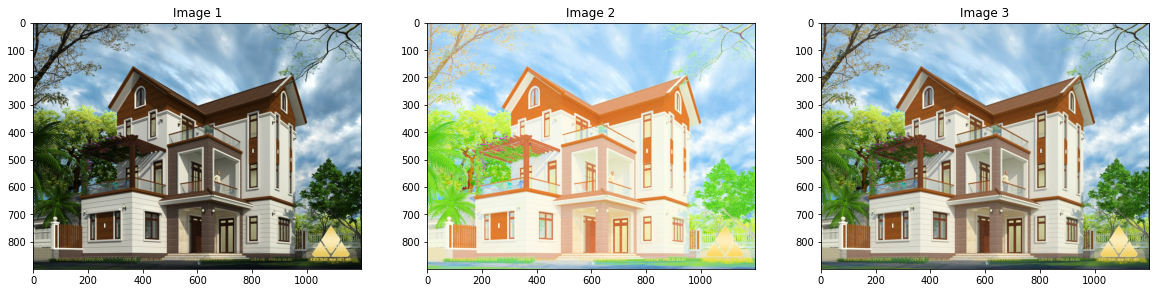

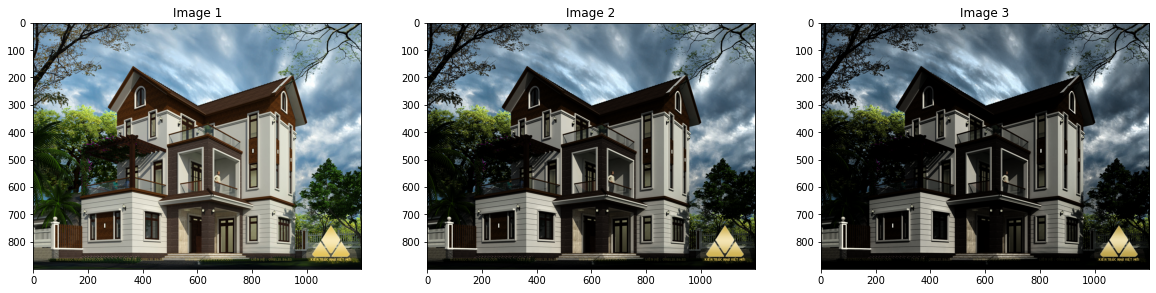

In [ ]:
# 7. Thực hiện các biến đổi gamma và hiển thị ảnh màu tương ứng (ĐIỀU  CHỈNH ĐỘ TƯƠNG PHẢN )
image2_hsv = cv2.cvtColor(image2_color, cv2.COLOR_RGB2HSV)

img = image2_hsv[:,:,2]  # Image on Value (Lightness) chanel
gamma = [0.1, 0.5, 1.2, 2.2, 3.2]
gamma_corrected_01 = np.array(255*(img / 255) ** gamma[0], dtype = 'uint8') # 1 bức ảnh là 1 ma trận  (mảng  2  chiều) của các điểm ảnh (các pixels).
gamma_corrected_02 = np.array(255*(img / 255) ** gamma[1], dtype = 'uint8') 
gamma_corrected_03 = np.array(255*(img / 255) ** gamma[2], dtype = 'uint8')
gamma_corrected_04 = np.array(255*(img / 255) ** gamma[3], dtype = 'uint8')
gamma_corrected_05 = np.array(255*(img / 255) ** gamma[4], dtype = 'uint8')

#________________________________________________________________________________________________________________________
# 
#    CÔNG THỨC THAY ĐỔI ĐỘ TƯƠNG PHẢN CỦA ẢNH:  
#        Tăng gamma:  255*((img/255)^(1/gamma)) for gamma > 1.0        ==>  0< 1/gamma <  1 ==>> Tăng độ  sáng  của  ảnh
#        Giảm gamma:  255*((img/255)^(1/gamma)) for 0<  gamma <  1.0   ==>  1/gamma > 1     ==>> Giảm độ  sáng  của  ảnh
#________________________________________________________________________________________________________________________

channel = 2

image_hsv_01 = image2_hsv.copy()
image_hsv_01[:,:,2] = gamma_corrected_01
image_enhanced_01 = cv2.cvtColor(image_hsv_01, cv2.COLOR_HSV2RGB)

image_hsv_02 = image2_hsv.copy()
image_hsv_02[:,:,2] = gamma_corrected_02
image_enhanced_02 = cv2.cvtColor(image_hsv_02, cv2.COLOR_HSV2RGB)

image_hsv_03 = image2_hsv.copy()
image_hsv_03[:,:,2] = gamma_corrected_03
image_enhanced_03 = cv2.cvtColor(image_hsv_03, cv2.COLOR_HSV2RGB)

image_hsv_04 = image2_hsv.copy()
image_hsv_04[:,:,2] = gamma_corrected_04
image_enhanced_04 = cv2.cvtColor(image_hsv_04, cv2.COLOR_HSV2RGB)

image_hsv_05 = image2_hsv.copy()
image_hsv_05[:,:,2] = gamma_corrected_05
image_enhanced_05 = cv2.cvtColor(image_hsv_05, cv2.COLOR_HSV2RGB)

ShowThreeImages(image2_color, image_enhanced_01, image_enhanced_02)
ShowThreeImages(image_enhanced_03, image_enhanced_04, image_enhanced_05)

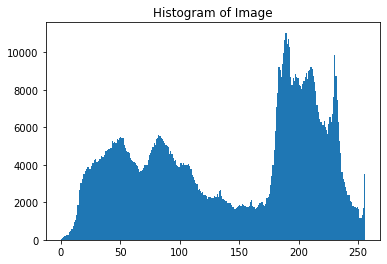

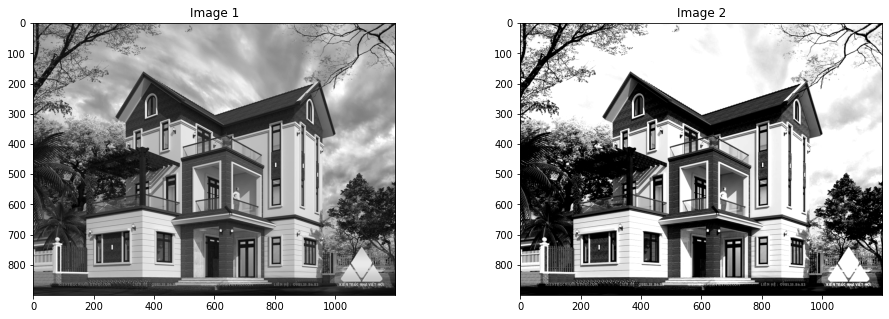

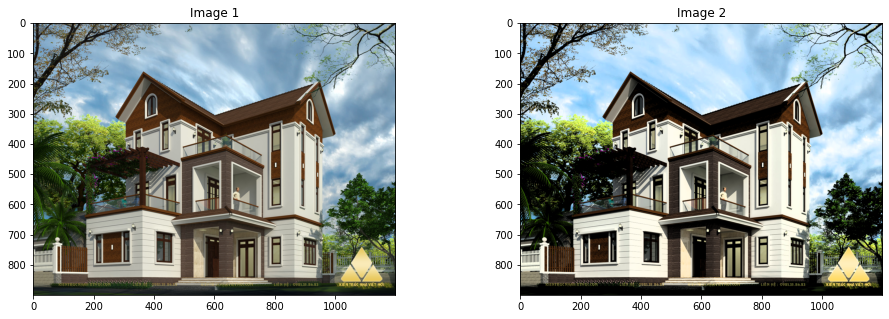

In [ ]:
# 8. Chọn ngưỡng mức tối và ngưỡng mức sáng 
#    mà ở đó dưới mức tối sẽ cho tối hơn và trên mức sáng sẽ cho sáng hơn trên kênh màu value trong hsv. Sau đó hiển thị ảnh kết quả sau khi enhance
def pixelValTransformation(pix, r1, s1, r2, s2):
  if (0 <= pix and pix <= r1):
    return (s1 / r1)*pix
  elif (r1 < pix and pix <= r2):
   return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
  else:
    return ((255 - s2)/(255 - r2)) * (pix - r2) + s2

image_hsv = cv2.cvtColor(image2_color, cv2.COLOR_RGB2HSV)

image_hsv_value = image_hsv[:,:,2]
hist = cv2.calcHist([image_hsv_value],[0],None,[256],[0,256])
plt.hist(image_hsv_value.ravel(),256,[0,256])
plt.title('Histogram of Image')
plt.show()
# Define parameters.
r1 = 50
s1 = 0
r2 = 200
s2 = 255
# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelValTransformation)
# Apply contrast stretching.
contrast_stretched = pixelVal_vec(image_hsv_value, r1, s1, r2, s2)
image_hsv[:,:,2] = contrast_stretched
image_enhanced = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
ShowTwoImages(image2_gray, contrast_stretched)
ShowTwoImages(image2_color, image_enhanced)



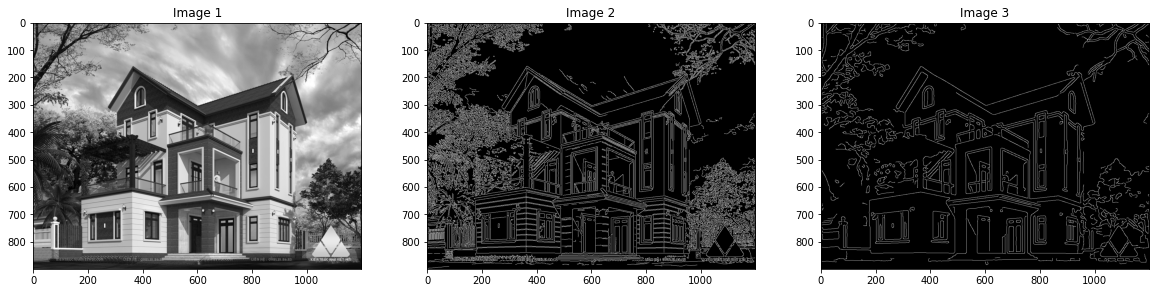

In [ ]:
# 9. Xuất ảnh biên/cạnh của ảnh gốc
from skimage import feature

# sigma help to remove the noisy image in edge detection
image_edges_01 = feature.canny(image2_gray)
image_edges_02 = feature.canny(image2_gray, sigma=3)
ShowThreeImages(image2_gray, image_edges_01, image_edges_02)